## PCA Demonstration in Python

In [1]:
# Importing the required libraries

In [49]:
import numpy as np, pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [50]:
data = pd.read_csv("Iris.csv")

In [51]:
data.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
y = data.pop("iris")

In [53]:
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Scaling the data

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
X = data.copy()

In [58]:
x = scaler.fit_transform(X)

In [59]:
x[:5,:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### Applying PCA on the data

In [60]:
from sklearn.decomposition import PCA

In [61]:
?PCA

Init signature:
PCA(
    n_components=None,
    *,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    n_oversamples=10,
    power_iteration_normalizer='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

With sparse inputs, the ARPACK implementation of the truncated SVD can be
used (i.e. through :func:`scipy.sparse.linalg.svds`). Alternatively, one
may consider :class:`TruncatedSVD` where the data are not centered.

Notice that this class only supports sparse inputs for some solvers such as
"arpack" and "c

In [62]:
pca = PCA(random_state=42)

In [63]:
pca.fit(x)

PCA(random_state=42)

In [64]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [ 0.72101681, -0.24203288, -0.14089226, -0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [65]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [66]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

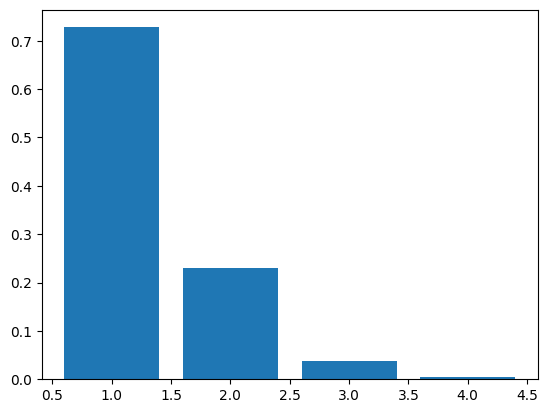

In [67]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [68]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

#### Making the scree plot

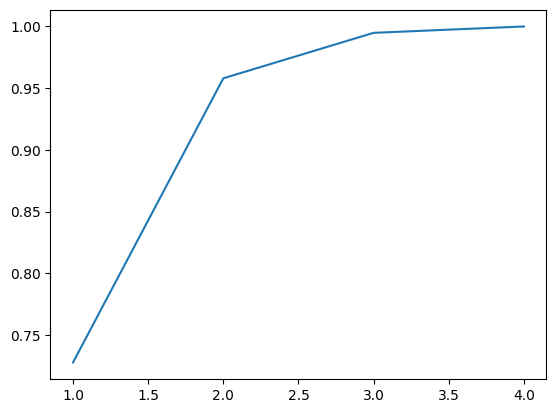

In [69]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

PCA with 2 components

In [70]:
pc2 = PCA(n_components=2, random_state=42)

In [71]:
newdata = pc2.fit_transform(x)

In [72]:
newdata.shape

(150, 2)

Making a dataframe out of it for convenience



In [73]:
df = pd.DataFrame(newdata, columns=["PC1", "PC2"])
df.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [74]:
df_final = pd.concat([df, y], axis=1)

In [75]:
df_final.head()

,PC1,PC2,iris
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Plotting the data

In [76]:
import seaborn as sns

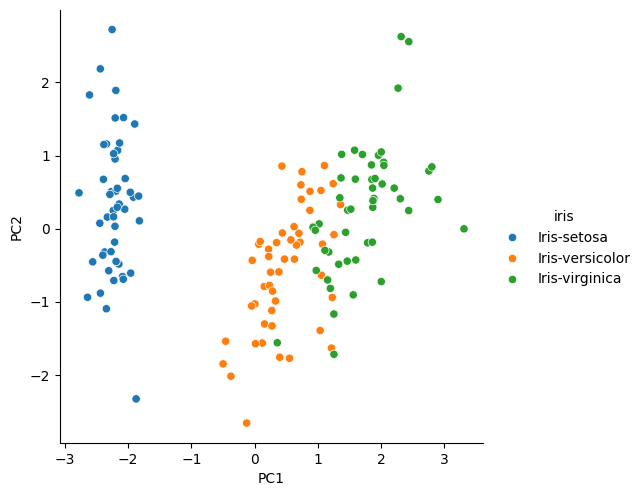

In [77]:
sns.pairplot(data=df_final, x_vars=["PC1"], y_vars=["PC2"], hue = "iris", size=5)